# 誤差逆伝播法(back propagation)

<!-- ここから生の HTML -->
<script
  src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"
  id="MathJax-script"
  async>
</script>
<!-- ここまで -->

- 重みパラメータの勾配の計算方法.
  1. 数値微分法(4章)
  2. 誤差逆伝播法(5章)
      - 数式
      - 計算グラフ(computational graph)


## 5.1 計算グラフ(computational graph)
### 計算グラフ
- 計算の過程をグラフによって表したもの. 
- 複数のノードとエッジ（矢印）から構成. 

### 5.1.1 計算グラフで解く
#### 問1. 太郎君はスーパーで1個100円のリンゴを2個買いました。支払う金額を求めなさい。ただし、消費税が10%適用されるものとする. 
- この問題を使って、計算グラフを書いてみる. 
- ルール
    - ノ ー ド: 〇で表記. 
    - 演　  算: 〇の中に書く.
    - 途中結果: エッジの上に表記

![](5-1.svg)

- 計算グラフの流れ
    1. リンゴの"100"円が「×2」ノードへ流れる
    2. "200"円になる
    3. "200"円が「×1.1」ノードへ流れる
    4. "220"円になる
    5. 答えは、220円

- 「リンゴの個数」と「消費税」を変数にする場合.
    - ノードを「×」へと変更
    - 一つのノードに二つが入射する. 

![](5-2.svg)

#### 問2. 太郎君はスーパーで1個100円のリンゴを2個, みかんを3個買いました。リンゴは1個100円、みかんは1個150円です。消費税が10%かかるとして、支払う金額を求めなさい. 
計算グラフ

![](5-3.svg)

- 加算ノード「＋」が新たに追加 $\rightarrow$ リンゴとみかんを合算
- 計算グラフの流れ
    1. リンゴの"100"円と個数である"2"が「×」ノードへ流れる.
    2. "200"円になる
    3. みかんの"150"円と個数である"3"が「×」ノードへ流れる.
    4. "450"円になる
    5. 2.の"200"円と4.の"450"円が、「＋」ノードへ流れる. 
    6. "650"円になる
    7. 6.の"650"と消費税の"1.1"が「×」ノードへ流れる. 
    8. "715"円になる
    5. 答えは、715円
- 計算グラフによる解き方
  1. 計算グラフを構築する.
  2. 計算グラフ上で計算を左から右へ進める.
- 左から右へ $\rightarrow$ **順伝播(forward propagation)**
- 右から左へ $\rightarrow$ **逆伝播(backward propagation)**

### 5.1.2 局所的な計算
- 計算グラフ特徴：「**局所的な計算**」を伝播することによって、最終的な結果を得ることができる. 
    - ノードに対する「入力」が分かれば「出力」を生成できる. 
    - ノード毎に「局所的な計算」をし、次のノードへと伝達するだけでいい. 

### 5.1.3 なぜ計算グラフで解くのか？
- 計算グラフで解く理由$\rightarrow$ 逆伝播によって「**微分**」を効率よく計算できる!!
- 問1の再考
    - リンゴの値段を$x$, 支払金額を$L$とする. 
    - 「リンゴの値段に関する支払金額の微分」= $\frac{\partial L}{\partial x}$
    - 計算グラフ上での**逆伝播**によって、微分を求めることができる. 

    ![](5-5.svg)

    - 逆伝播
        - 順方向とは逆向きの矢印
        - 「局所的な微分」を伝達
        - 「1 $\rightarrow$ 1.1 $\rightarrow$ 2.2」
        - 「リンゴが微少量増加したら、最終的な金額はその2.2倍になる」という意味. 
    - こうして、順伝播と逆伝播によって、各変数の微分の値を効率よく求めることができる. 
    

## 5.2 連鎖律
- 「局所的な微分」を伝達する原理　$\rightarrow$ **連鎖率(chain law)**

### 5.2.1 計算グラフの逆伝播
- $y=f(x)$という計算の逆伝播
- 信号Eに対して, $\frac{\partial y}{\partial x}$を乗算し、次のノードへと伝達.

![](5-6.svg)

### 5.2.2 連鎖律とは
- 合成関数(複数の関数によって構成される関数)
$$
\begin{aligned}
z &= t^2\\
t &= x + y
\end{aligned}
\tag{5.1}
$$

- 連鎖率の原理(=合成関数の微分についての性質)
  > ある関数が合成関数で表される場合、その合成関数の微分は、合成関数を構成するそれぞれの関数の微分の積によって表すことができる。

- (5.1)式でいえば、$\frac{\partial z}{\partial x}$は、$\frac{\partial y}{\partial t}$ と$\frac{\partial t}{\partial x}$の積によって表すことができる. 
$$
\cfrac{\partial z}{\partial x} = \cfrac{\partial z}{\partial t} \cfrac{\partial t}{\partial x}
\tag{5.2}
$$
- 連鎖律を使って、(5.2)式の微分$\frac{\partial z}{\partial x}$を求めるために、局所的な微分（偏微分）を求める.
$$
\begin{aligned}
\cfrac{\partial z}{\partial t} = 2t \\
\cfrac{\partial t}{\partial x} = 1
\end{aligned}
\tag{5.3}
$$
- 従って、$\frac{\partial z}{\partial x}$を計算すると、
$$
\cfrac{\partial z}{\partial x} = \cfrac{\partial z}{\partial t} \cfrac{\partial t}{\partial x} = 2t \cdot 1 = 2(x+y)
\tag{5.4}
$$


### 5.2.3 連鎖律と計算グラフ
- (5.4)式で行った連鎖律の計算を、計算グラフで表す. 

![](5-7.svg)

- 計算の順伝播
    - 右から左へと、信号を伝播
    - ノードへの入力信号に対して、局所的な微分（偏微分）を乗算して、次のノードへと伝達. 
    - 一番左の結果は、「xに関するzの微分」に対応. 

![](5-8.svg)

## 5.3 逆伝播
ここでは、「＋」や「×」などの演算を例に、逆伝播の仕組みについて説明する.
### 5.3.1 加算ノードの逆伝播
- $z=x+y$について考える. 
- 解析的に微分すると、ともに$\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y}$は共に1となる. 
$$
\begin{aligned}
\cfrac{\partial z}{\partial x} = 1 \\
\cfrac{\partial z}{\partial y} = 1
\end{aligned}
\tag{5.5}
$$
- 計算グラフで表すと、次のようになる. 
  - 上流から伝わった微分を、そのまま下流へ流すだけ.
  - 下流に$\frac{\partial L}{\partial x},\frac{\partial L}{\partial y}$ の値を伝播させていく. 

![](5-9a.svg)

![](5-9b.svg)

- 具体例 : $10+5=15$を加算ノードに通すと……？
  - 加算ノードの順伝播は、入力信号を次のノードへ出力するだけなので、下記のようになる.

![](5-11a.svg)

![](5-11b.svg)



### 5.3.2 乗算ノードの逆伝播
- $z=xy$について考える. 
- 解析的に微分すると、ともに$\frac{\partial z}{\partial x}=y, \frac{\partial z}{\partial y}=x$となる. 
$$
\begin{aligned}
\cfrac{\partial z}{\partial x} = y \\
\cfrac{\partial z}{\partial y} = x
\end{aligned}
\tag{5.6}
$$
- 計算グラフで表すと、次のようになる. 
  - 上流の値に、順伝播の際の入力信号を”ひっくり返した値”を乗算して下流へ流す. 
  - 順伝播のときの入力信号が必要. $\rightarrow$ 実装時には、入力信号を保持する仕組みが必要!!

### 5.3.3 リンゴの例
- 解きたい問題
  - **リンゴの値段、リンゴの個数、消費税の三つの変数が、それぞれ最終的な支払金額にどのように影響するか**、ということ. 
  - (順伝播の値を使いながら)逆伝播を使って、計算グラフを作成. 

![](5-14.svg)

- 結果
  1. リンゴの値段 : 2.2
  2. リンゴの個数 : 110
  3. 消費税 : 200

  の大きさで、最終的な支払金額に影響を与える(但し、消費税と金額はスケールが違うので注意).

- 「リンゴとみかんの買い物」の逆伝播を導く. 

![](5-15.svg)

## 5.4 単純なレイヤの実装
加算ノード、乗算ノードをそれぞれ加算レイヤ、乗算レイヤとして実装.
### 5.4.1 乗算レイヤの実装
- MulLayer
  - インスタンス変数(入力信号を保持するために必要)
    - self.x
    - self.y
  - メソッド
    - \_\_init\_\_
    - forward()  →　順方向に入力信号を伝播.
    - backward()　→　forwardとは逆方向に、微分を計算. 

In [6]:
import sys, os
sys.path.append(os.pardir) # ＋親ディレクトリ
import numpy as np

In [7]:
class Mulayer: # 乗算レイヤ
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x*y
        return out
    def backward(self, dout): #dout : 上流から伝わってきた微分
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

「リンゴの買い物」に照らし合わせると……

![](5-16.svg)

In [8]:
apple = 100
apple_num = 2
tax = 1.1

# layer
mul_apple_layer = Mulayer()
mul_tax_layer = Mulayer()

# forward(順伝播)
apple_price = mul_apple_layer.forward(apple, apple_num)     
price = mul_tax_layer.forward(apple_price, tax)                 

print(f"forward: {price:.0f}")

# backward(逆伝播)
dprice = 1 # 最後の乗算ノードからの出力と最終値は同じ（微分は1）
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(f"backward: {dapple}, {dapple_num:.0f}, {dtax}")  # 図5.16の結果と一致!

forward: 220
backward: 2.2, 110, 200


### 5.4.2 加算レイヤの実装
<style>
  r { color: red; }
</style>

- AddLayer
    - インスタンス変数
        - <r>なし！</r>(加算レイヤは入力値を保持する必要がない)
    - メソッド
        - \_\_init\_\_
        - forward()
        - backward()

In [9]:
class AddLayer:
    def __init__(self):
        pass    # 入力信号を保持する必要がない

    def forward(self, x, y):
        out = x+y
        return out
    
    def backward(self, dout):   # 上流からの微分をそのまま下流へ
        dx = dout * 1
        dy = dout * 1
        return dx, dy

「リンゴ２個とみかん３個の買い物」に照らし合わせると……

![](5-17.svg)

In [10]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = Mulayer()
mul_orange_layer = Mulayer()
add_apple_orange = AddLayer()
mul_tax_layer = Mulayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(f"{price:.0f}")
print(f"{dapple}, {dapple_num:.1f}, {dorange:.1f}, {dorange_num:.1f}, {dtax}")

715
2.2, 110.0, 3.3, 165.0, 650


## 5.5 活性化関数レイヤの実装
- 計算グラフ　-> ニューラルネットワークへ
- ニューラルネットワークを構成する「層(layer)」を一つのクラスとして実装

### 5.5.1 ReLU(Rectified Linear Unit)レイヤ
- 定義式
    $$
    y = 
    \begin{cases}
    x     & (x > 0),\\
    0     & (x \le 0).
    \end{cases}
    \tag{5.7}
    $$
- xに関するyの微分
    $$
    \cfrac{\partial y}{\partial x} = 
    \begin{cases}
    1     & (x > 0),\\
    0     & (x \le 0).
    \end{cases}
    \tag{5.8}
    $$
    - 下流に対して、x(順伝播時の入力)が0より大きければ1を、0以下であれば流さない(<span style="color:red;">信号がストップ</span>). 
    - 「**スイッチ**」のように動作する。
        - 順伝播時に電流が流れている(x >  0) -> スイッチON(逆伝播時にも微分は1)
        - 順伝播時に電流が流れてない(x <= 0) -> スイッチON(逆伝播時にも微分は<span style="color:red;">0</span>)


![](5-18a.svg)

![](5-18b.svg)

#### 実装

In [11]:
# ReLUレイヤの実装
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0) # bool型配列
        out = x.copy()
        out[self.mask] = 0   # trueの要素に0を代入
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0     # x <= 0で偏微分は0
        dx = dout * 1           # x >  0で　〃　　1
        return dx

#### インスタンス変数maskについて
- mask : True/False からなるNumpy配列
- 順伝播の入力であるxの要素で、0以下の場所をTrue, 0より大きい場所をFalseとして保持. 

In [12]:
# テスト(bool型配列)
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)
mask = (x<=0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


### 5.5.2 Sigmoidレイヤ
Sigmoid関数を実装していく. 
- 定義式
    $$
    y = 
    \cfrac{1}{1+\exp (-x)}
    \tag{5.7}
    $$
- 計算グラフによる表現

![](5-19.svg)

- 除算ノード「/」($y=\frac{1}{x}$)について
    $$
        \cfrac{\partial y}{\partial x} = -\cfrac{1}{x^2} = -y^2
        \tag{5.10}
    $$
    より、上流の値に対して、$-y^2$を乗算して下流へ伝播させればよい. 
- expノード「exp」について
    $$
    \cfrac{\partial y}{\partial x} = 
    \exp(x)
    \tag{5.11}
    $$
- これらを、図5.19に沿って逆伝播を求めていくと、計算グラフは次のようになる. 

![](5-20.svg)

- 真ん中の部分をグループ化した「sigmoid」ノードとして書くと、次のようになる. 

![](5-21.svg)

- $\frac{\partial L}{\partial y} y^2 \exp(-x)$を、さらに整理して計算する. 
    $$
    \begin{aligned}
    \cfrac{\partial y}{\partial x} &= 
    \cfrac{\partial L}{\partial y} \cfrac{1}{(1+\exp (-x))^2} \exp(-x)\\
    &= \cfrac{\partial L}{\partial y} \cfrac{1}{(1+\exp (-x))^2} \cfrac{\exp(-x)}{1+\exp(-x)}\\
    &= \cfrac{\partial L}{\partial y} y(1-y)
    \end{aligned}
    \tag{5.12}
    $$
- 従って、Sigmoidレイヤの逆伝播は、順伝播の出力だけから計算できる. 

![](5-22.svg)

#### 実装

In [13]:
# Sigmoidレイヤの実装
class Sigmoid:
    def __init__(self):
        self.out = None     # ノードからの出力信号は保持する

    def forward(self, x):
        out = 1/(1+np.exp(-x))
        return out
    
    def backward(self, dout):   
        dx = dout * (1.0 - self.out) * self.out
        #   ∂L/∂x * ( 1   -    y )   *    y
        return dx

## 5.6 Affine/Softmaxレイヤの実装
### 5.6.1 Affineレイヤ
- ニューラルネットワークの順伝播 -> 重み付き信号の総和を行列の積で計算.
- np.dotを用いる. 

In [14]:
X = np.random.rand(2)       # 入力
W = np.random.rand(2, 3)    # 重み
B = np.random.rand(3)       # バイアス

print(X.shape)
print(W.shape)
print(B.shape)

Y = np.dot(X, W) + B 
print(Y)
print(Y.shape)

(2,)
(2, 3)
(3,)
[0.89118347 0.37067919 0.21076387]
(3,)


### ※Affine変換
- 線形変換と平行移動を組み合わせた変換.

    $Y = X\cdot W + B$
    - $X\cdot W$ : 線形変換
    - $B$  : 平行移動
- 変換前の座標を(x,y), 変換後の座標を(u,v)とすると、
$$
\begin{bmatrix}
u \\
v
\end{bmatrix}
=
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
+
\begin{bmatrix}
e \\
f
\end{bmatrix}
$$
- 3×3行列を使うと、一つの積で完結できる. 
$$
\begin{bmatrix}
u \\
v \\
1
\end{bmatrix}
=
\begin{bmatrix}
a & b & e \\
c & d & f \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\ 
1
\end{bmatrix}
$$
- アフィン変換の例
    - 拡大/縮小(X軸方向の拡大率$S_x$, Y軸方向の拡大率$S_y$)
        $$
        \begin{bmatrix}
        u \\
        v \\
        1
        \end{bmatrix}
        =
        \begin{bmatrix}
        S_x & 0 & 0 \\
        0 & S_y & 0 \\
        0 & 0 & 1
        \end{bmatrix}
        \begin{bmatrix}
        x \\
        y \\ 
        1
        \end{bmatrix}
        =
        \begin{bmatrix}
        S_x x \\ 
        S_y y \\ 
        1
        \end{bmatrix}
        $$
    - 平行移動(X軸方向へ$\gamma_x$, Y軸方向へ$\gamma_y$だけ移動)
        $$
        \begin{bmatrix}
        u \\
        v \\
        1
        \end{bmatrix}
        =
        \begin{bmatrix}
        1 & 0 & \gamma_x \\
        0 & 1 & \gamma_y \\
        0 & 0 & 1
        \end{bmatrix}
        \begin{bmatrix}
        x \\
        y \\ 
        1
        \end{bmatrix}
        =
        \begin{bmatrix}
        x + \gamma_x \\ 
        y + \gamma_y \\ 
        1
        \end{bmatrix}
        $$
    - 回転(原点周りに$\theta^\circ$回転)
        $$
        \begin{bmatrix}
        u \\
        v \\
        1
        \end{bmatrix}
        =
        \begin{bmatrix}
        \cos\theta & -\sin\theta & 0 \\
        \sin\theta &  \cos\theta & 0 \\
        0 & 0 & 1
        \end{bmatrix}
        \begin{bmatrix}
        x \\
        y \\ 
        1
        \end{bmatrix}
        =
        \begin{bmatrix}
        x\cos\theta - y\sin\theta  \\ 
        x\sin\theta + y\cos\theta \\
        1
        \end{bmatrix}
        $$
    


#### 逆伝播の計算
- これまでは「スカラ値」がノード間を流れていたが、Affineレイヤでは、「行列」がノードを伝播. 
- 計算グラフは次のようになる. 

![](5-24.svg)

- 逆伝播（偏微分）は次のようになる. 
    $$
    \begin{aligned}
    \cfrac{\partial y}{\partial \mathbf{X}} = \cfrac{\partial L}{\partial \mathbf{Y}} \cdot \mathbf{W}^T \\
    \cfrac{\partial y}{\partial \mathbf{W}} = \mathbf{X}^T \cdot \cfrac{\partial L}{\partial \mathbf{Y}}\\
    \end{aligned}
    \tag{5.13}
    $$
    - 成分表示による導出.
        $$
        Y_{ij} = \sum_k X_{ik}W_{kj}
        $$
        損失$L$を$Y_{ij}$によって微分すると、
        $$
        \cfrac{\partial L}{\partial X_{ik}} = \sum_j \cfrac{\partial L}{\partial Y_{ij}} \cfrac{\partial Y_{ij}}{\partial X_{ik}} = \sum_j \cfrac{\partial L}{\partial Y_{ij}} W_{kj} = \sum_j \cfrac{\partial L}{\partial Y_{ij}} (W^T)_{jk} = \left[ \cfrac{\partial L}{\partial \mathbf{Y}}\mathbf{W}^T \right]_{ik}
        $$
        同様に、$W_{kj}$によって微分すると、
        $$
        \cfrac{\partial L}{\partial W_{kj}} = \sum_i \cfrac{\partial L}{\partial Y_{ij}} \cfrac{\partial Y_{ij}}{\partial W_{kj}} = \sum_i \cfrac{\partial L}{\partial Y_{ij}} X_{ik}
        $$
        これはスカラー同士の掛け算であるから、積の順番を入れ替えてよく、
        $$
        = \sum_i X_{ik}\cfrac{\partial L}{\partial Y_{ij}}  =  \sum_i (X^T)_{ki}\cfrac{\partial L}{\partial Y_{ij}} = \left[ \mathbf{X}^T \cfrac{\partial L}{\partial \mathbf{Y}} \right]_{kj}
        $$
        以上導出終わり. 

- 計算グラフでの逆伝播は次のようになる.

![](5-25.svg)

- 注意点
    - (M,)は(1,M)のようにして、行列の積として考えると分かりやすい. numpyの一次元リストは、"行列のようなもの”. 
    - 各変数の形状について、$\mathbf{X}$と$\frac{\partial L}{\partial \mathbf{X}}$、および$\mathbf{W}$と$\frac{\partial L}{\partial \mathbf{W}}$は同じ形状である(ベクトルによる偏微分というのは結局, 各成分ごとに偏微分をすることなので).
    $$
    \begin{aligned}
    \mathbf{X} &= (x_0, x_1, \dots, x_n) \\ 
    \cfrac{\partial L}{\partial \mathbf{X}} &= (\cfrac{\partial L}{\partial x_0}, \cfrac{\partial L}{\partial x_1}, \cdots,\cfrac{\partial L}{\partial x_n})
    \end{aligned}
    \tag{5.15}
    $$


![](5-26.svg)

### 5.6.2 バッチ版Affineレイヤ
- Affineレイヤ
    - 入力$\mathbf{X}$は一つのデータ.
- バッチ版Affineレイヤ
    - 入力$\mathbf{X}$はN個のまとまったデータ(バッチ). 
#### 変更点
- 計算グラフでは、入力である$\mathbf{X}$の形状が$(N,2)$となる.
- バイアスは、それぞれのデータに対して加算される.
    - それぞれのデータの逆伝播の値が、バイアスの要素($b_1, b_2, \cdots, b_N$)に集約される(データごとに合算される)必要がある. 

In [15]:
# 順伝播
X_dot_W = np.array([[0,0,0],[10,10,10]]) 
B = np.array([1,2,3])
print(X_dot_W)

print(X_dot_W + B)  # 順伝播では、（当然だが）X_dot_W[0], X_dot_W[1]のそれぞれに、バイアスBが加算される. 

[[ 0  0  0]
 [10 10 10]]
[[ 1  2  3]
 [11 12 13]]


In [16]:
# 逆伝播
dY = np.array([[1,2,3,],[4,5,6,]])
print(dY)

dB = np.sum(dY, axis=0) # axis=0(同じ列)で合計 -> dB.shape=(3,)
print(f"{dB}: axis=0")

dB = np.sum(dY, axis=1) # axis=1(同じ行)
print(f"{dB}: axis=1")

[[1 2 3]
 [4 5 6]]
[5 7 9]: axis=0
[ 6 15]: axis=1


In [17]:
class Affine:
    def __init__(self, W, b):
        self.W = W      # 重み W: (2, 3)
        self.b = b      # バイアス b: (3,)
        self.x = None   # 入力信号
        self.dW = None  # W の勾配
        self.db = None  # b の勾配
    
    def forward(self, x):
        # x: (N, 2)
        self.x = x
        out = np.dot(x, self.W) + self.b  # b は (3,) がブロードキャストされ、(N,3)になる
        return out  #(N, 3)
    
    def backward(self, dout):
        # dout: ∂L/∂Y 上流からの微分 (N, 3)
        dx = np.dot(dout, self.W.T)           # (N, 2)
        self.dW = np.dot(self.x.T, dout)      # (2, 3)
        # サンプルごとの dout を全て足し合わせる <- "それぞれのデータの逆伝播値がバイアスの要素に集約" 
        self.db = np.sum(dout, axis=0)        # (3,)
        return dx


### 5.6.3　Softmax-with-Lossレイヤ(出力層)
#### Softmax関数
- 入力された値を正規化して出力する.
- 手書き認識の際は、10クラス分類を行うため、Softmaxレイヤへの入力は10個あることになる. 
- 通常、「推論」では使用せず「学習」で使用する.
-   $
    \left\{
    \begin{array}{l}
    \text{\small スコア: 正規化しない出力結果}\\
    \text{\small 確　率: 正規化された出力結果}
    \end{array}
    \right.
    $
    - 学習時：スコア -> Softmax　-> 確率 -> Cross Entropyなど -> パラメタ更新
    - 推論時：スコア -> そのまま最大値がほしい.

![](5-30.svg)

#### 計算グラフ

-   順伝播
    $
    \colon
    \left\{
    \begin{array}{l}
    {\small (y_1,y_2,y_3)\colon \text{Softmaxレイヤの出力}},\\
    {\small (t_1,t_2,t_3)\colon \text{教師ラベル}}
    \end{array}
    \right.
    $
- 逆伝播$\colon(y_1-t_1, y_2-t_2, y_3-t_3)$
- ニューラルネットワークの逆伝播では、この<span style="color:red;">差分(誤差)が前レイヤへと伝わっていく</span>. <- 重要な性質
- もともと、Cross Entropy Error はこうなるように設計された関数. 
    - 回帰問題では、出力層に「恒等関数」を用い、損失関数として「二乗和誤差」を用いるが、これも同様の理由による. 

#### 実装

In [18]:
from common.functions import *  # softmax, cross entropy error

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 損失
        self.y = None # softmaxの出力
        self.x = None # 教師データ(one-hot vector)

    def forward(self, x, t):
        self.t = t
        self.t = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss 
    
    def backward(self, dout=1): 
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size     # データ一個あたりの誤差を伝播
        return dx 

## 5.7 誤差逆伝播法の実装
前節で実装したレイヤを組み合わせることにより、ニューラルネットワークを構築する. 
### 5.7.1 ニューラルネットワークの学習の全体図
#### 前提  
ニューラルネットワークには, 
$
\left\{
\begin{array}{l}
{\small \text{1. 重み}},\\
{\small \text{2. バイアス}}
\end{array}
\right.
$
がある. この重みとバイアスを、**訓練データに適応するように調整**することを、「学習」と呼ぶ.
#### 学習の手順
1. ミニバッチ  
訓練データの中からランダムに一部のデータを選び出す. 
2. 勾配の算出  
各重みパラメタに関する損失関数の勾配を求める.       $\leftarrow$ $
\left\{
\begin{array}{l}
{\small \text{4章: 数値微分}},\\
{\small \text{5章: **誤差逆伝播法**}}
\end{array}
\right.
$
3. パラメタの更新  
重みパラメタを勾配方向に微少量だけ更新する.
4. 繰り返す  
1~3を繰り返す. 

### 5.7.2 誤差逆伝播法に対応したニューラルネットワークの実装
- Ordered Dict
    - ニューラルネットワークのレイヤをOrderedDict(順番付き辞書)として保持する.
    - 辞書に追加した要素の順番を覚えることができる. 
    - $
    \left\{
    \begin{array}{l}
    {\small \text{順伝播 : 追加した順にレイヤのforward()を呼び出す.}}\\
    {\small \text{逆伝播 : 逆の順番でレイヤを呼び出す.}}
    \end{array}
    \right.
    $ とするだけでよい!!
    - レイヤを正しい順番で連結、順番に（または逆順に）呼び出すだけでよい. 
- レイヤ
    - ニューラルネットワークの構成要素を「レイヤ」として実装(モジュール化). 
    - 大きなネットワークとなっても、レイヤを追加するだけ. 

In [19]:
from common.layers import *  #同階層（＋親ディレクトリ）にある common/layers.py （または common/layers/ パッケージ）から、定義されているクラス・関数を全て読み込み
from common.gradient import numerical_gradient # common/gradient.py から numerical_gradient 関数だけを読み込み
from collections import OrderedDict 


class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads


### 5.7.3 誤差逆伝播法の勾配確認
- 誤差逆伝播法 :  計算が早いが、ミスが起きやすい. 
- 数値微分法   :　計算は遅いが、正確. $\rightarrow$ 実装の正しさを確認する(<span style="color:red;">勾配確認(gradient check)</span>)ために用いる. 

#### 実装

In [20]:
# gradient_check.py
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)    # np.random.randnを使って重み生成　→　毎回出力結果が変わる

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:3.6219084513149784e-10
b1:2.2086773514604737e-09
W2:5.198418234530328e-09
b2:1.3993456773053747e-07


1e-9~1e-10オーダーの違いなので、ほぼ同じと言える. 

### 5.7.4 誤差逆伝播法を使った学習

In [21]:
# train_neuralnet.py

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000   # 繰り返し回数
train_size = x_train.shape[0]   # (60000, 784) → 60000
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)    # 何回バッチ更新すれば全データを一巡するか

print("iter:train_acc, test_acc")   # 繰り返し回数, 訓練データセット, 未知データセットをつかった時の精度
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"{i:4d}:{train_acc:.5f}, {test_acc:.5f}")

(60000, 784)
iter:train_acc, test_acc
   0:0.11567, 0.11670
 600:0.90142, 0.90680
1200:0.92302, 0.92650
1800:0.93590, 0.93640
2400:0.94495, 0.94410
3000:0.95203, 0.95080
3600:0.95598, 0.95240
4200:0.96143, 0.95670
4800:0.96355, 0.95930
5400:0.96662, 0.96190
6000:0.96905, 0.96440
6600:0.97122, 0.96680
7200:0.97318, 0.96610
7800:0.97442, 0.96720
8400:0.97655, 0.96970
9000:0.97740, 0.96860
9600:0.97867, 0.96950


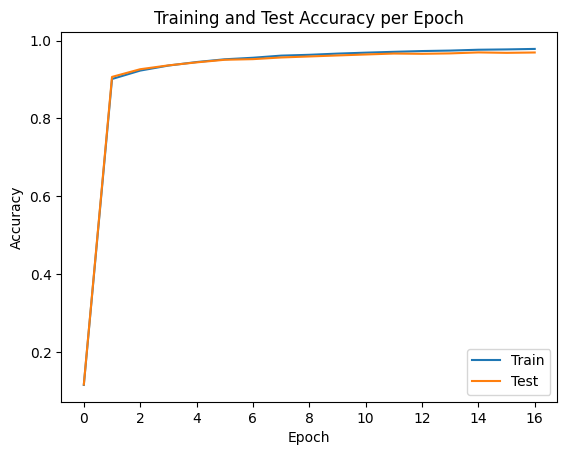

In [23]:
# グラフで確認
import matplotlib.pyplot as plt

epochs= np.arange(len(train_acc_list)) # 0, 1, ...

plt.figure()
plt.plot(epochs, train_acc_list)
plt.plot(epochs, test_acc_list)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy per Epoch")
plt.legend(["Train", "Test"])
plt.show()


#### 結果
- 初期
    - 1エポック後には訓練精度が90%以上　
    - 5~6エポックで95%以上 
    - 訓練98%, テスト97%程度に収束
- 過学習の兆候
    - 最終的に、訓練精度(Train) > テスト制度(Test) 

#### まとめ
- 計算グラフを用いれば、計算過程を視覚化できる.
- 計算グラフのノードは、局所的な計算によって構成される. 
- 計算グラフの順伝播は、通常の計算を行う。一方、計算グラフの逆伝播によって、各ノードの微分を求めることができる. 
- ニューラルネットワークの構成要素をレイヤとして実装することで、重みパラメータの勾配の計算を効率的に求めることができる(誤差逆伝播法).
- 数値微分と誤差逆伝播法の結果を比較することで、誤差逆伝播法の実装に誤りがないことを確認できる(勾配確認)
- レイヤによるモジュール化によって、ニューラルネットワークでは、レイヤを自由に組み合わせることができ、自分の好きなネットワークを簡単に作れる.